 **SAURABH MANGALVEDHEKAR**
 

In [1]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [3]:
dataset=tf.keras.datasets.fashion_mnist
(x_train , y_train) ,(x_test , y_test) = dataset.load_data()
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.20)
x_train=x_train.reshape(48000,28,28,1)
x_train = x_train/255.0
x_val=x_val.reshape(12000,28,28,1)
x_val=x_val/255.0
x_test=x_test.reshape(10000,28,28,1)
x_test = x_test/255.0
model=tf.keras.models.Sequential([
                                  tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(28,28,1)),
                                  tf.keras.layers.MaxPooling2D(2,2),
                                  tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPooling2D(2,2),
                                  tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPooling2D(2,2),

                                  tf.keras.layers.Dropout(0.2),
                                  tf.keras.layers.Flatten(),
                                  tf.keras.layers.Dense(128,activation=tf.nn.relu),
                                  tf.keras.layers.Dense(10,activation=tf.nn.softmax)
                                  
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history=model.fit(x_train,y_train,epochs=10,batch_size=20,verbose=1,validation_data=(x_val,y_val))


Epoch 1/10
2400/2400 [==============================] - 30s 12ms/step - loss: 0.7008 - accuracy: 0.7400 - val_loss: 0.4923 - val_accuracy: 0.8223
Epoch 2/10
2400/2400 [==============================] - 30s 12ms/step - loss: 0.4988 - accuracy: 0.8155 - val_loss: 0.4279 - val_accuracy: 0.8439
Epoch 3/10
2400/2400 [==============================] - 29s 12ms/step - loss: 0.4378 - accuracy: 0.8377 - val_loss: 0.3972 - val_accuracy: 0.8557
Epoch 4/10
2400/2400 [==============================] - 29s 12ms/step - loss: 0.3978 - accuracy: 0.8532 - val_loss: 0.3756 - val_accuracy: 0.8617
Epoch 5/10
2400/2400 [==============================] - 30s 12ms/step - loss: 0.3714 - accuracy: 0.8621 - val_loss: 0.3431 - val_accuracy: 0.8727
Epoch 6/10
2400/2400 [==============================] - 29s 12ms/step - loss: 0.3505 - accuracy: 0.8699 - val_loss: 0.3279 - val_accuracy: 0.8808
Epoch 7/10
2400/2400 [==============================] - 29s 12ms/step - loss: 0.3321 - accuracy: 0.8764 - val_loss: 0.3184 -

In [4]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 64)          18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 1, 64)         

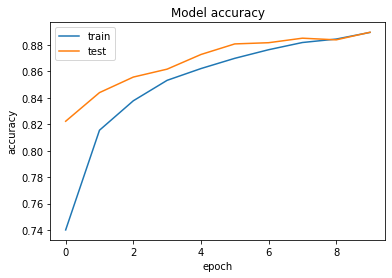

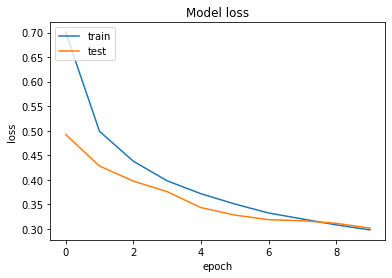

In [5]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

